In [1]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np 
from splearn.DecisionTree.DecisionTree import DecisionTree

In [2]:
bank_data: pd.DataFrame = pd.read_csv("data/bank/train.csv")
bank_data.head()

,age,job,marital,edu,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,no
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,no
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,no
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes


In [3]:
from sklearn.model_selection import train_test_split

features = bank_data[bank_data.columns[:-1]]
target = bank_data[bank_data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.2)

In [4]:
from splearn.DecisionTree.DecisionTree import DecisionTree
import sklearn.metrics as skmet
import splearn.Metrics as spmet

bank_dt: DecisionTree = DecisionTree()
bank_dt.train(
    X_train,
    y_train,
    gain="entropy",
    max_depth=2
)

preds = bank_dt.predict(X_test)

print(skmet.accuracy_score(y_test, preds))
print(spmet.accuracy_score(y_test, preds))

0.88275
0.88275


In [5]:
from splearn.DecisionTree.DecisionTree import DecisionTree
import sklearn.metrics as skmet
import splearn.Metrics as spmet



wght_train = pd.Series(np.array([i+1 for i in range(len(y_train))]))
wght_test = pd.Series(np.array([i+1 for i in range(len(y_test))]))

wght_train.index = X_train.index
wght_test.index = X_test.index

bank_dt: DecisionTree = DecisionTree()
bank_dt.train(
    X_train,
    y_train,
    weights=wght_train,
    gain="entropy",
    max_depth=2
)

preds = bank_dt.predict(X_test)

print(skmet.accuracy_score(y_test, preds))
print(spmet.accuracy_score(y_test, preds, wght_test))

0.88275
0.8838691577105724


In [6]:
from splearn.EnsembleLearning.EnsembleLearning import AdaBooster
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.33)

ab = AdaBooster(DecisionTree)
ab.train(
    X_train,
    y_train,
    10,
    learning_rate = 1,
    learner_args={
        "gain": "entropy",
        "max_depth": 2
    }
)
print("Model trained!")

dt = DecisionTree()
dt.train(X_train, y_train, gain="entropy", max_depth = 2)

dt_preds = dt.predict(X_test)
ab_preds = ab.predict(X_test)


print(spmet.accuracy_score(dt_preds, y_test))
print(confusion_matrix(dt_preds, y_test))
print()
print(spmet.accuracy_score(ab_preds, y_test))
print(confusion_matrix(ab_preds, y_test))

Model trained!
0.8773134328358209
[[2939  411]
 [   0    0]]

0.8844776119402985
[[2934  382]
 [   5   29]]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.33)

rates = [
    "entropy",
    "majority error",
    "gini"
]
iters = 500

data = np.zeros((iters // 10, len(rates)))

boosters = {}
for r in rates:
    ab = AdaBooster(DecisionTree)
    ab.train(
        X_train,
        y_train, 
        iterations = 0,
        learning_rate=1,
        learner_args = {
            "gain": r,
            "max_depth": 2
        }
    )
    boosters[r] = ab

for i in range(iters // 10):

    for j, r in enumerate(rates):

        boosters[r].iterate(10)
        preds = boosters[r].predict(X_test)

        data[i, j] = spmet.accuracy_score(preds, y_test)

    print(f'Size {i * 10} complete!')



Size 0 complete!
Size 10 complete!
Size 20 complete!
Size 30 complete!
Size 40 complete!
Size 50 complete!
Size 60 complete!
Size 70 complete!
Size 80 complete!
Size 90 complete!
Size 100 complete!
Size 110 complete!
Size 120 complete!
Size 130 complete!
Size 140 complete!
Size 150 complete!
Size 160 complete!
Size 170 complete!
Size 180 complete!
Size 190 complete!
Size 200 complete!
Size 210 complete!
Size 220 complete!
Size 230 complete!
Size 240 complete!
Size 250 complete!
Size 260 complete!
Size 270 complete!
Size 280 complete!
Size 290 complete!
Size 300 complete!
Size 310 complete!
Size 320 complete!
Size 330 complete!
Size 340 complete!
Size 350 complete!
Size 360 complete!
Size 370 complete!
Size 380 complete!
Size 390 complete!
Size 400 complete!
Size 410 complete!
Size 420 complete!
Size 430 complete!
Size 440 complete!
Size 450 complete!
Size 460 complete!
Size 470 complete!
Size 480 complete!
Size 490 complete!


In [26]:
dt = DecisionTree()
dt.train(X_train, y_train, gain="entropy", max_depth = 2)

dt_preds = dt.predict(X_test)
spmet.accuracy_score(dt_preds, y_test)

0.8755223880597015

<AxesSubplot:>

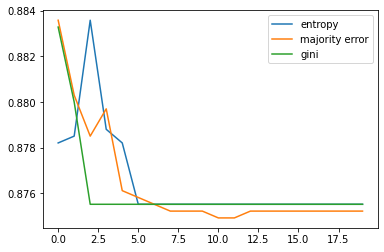

In [27]:
results = pd.DataFrame(data, columns=rates)
results.plot()